In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

#Jupyter magic to notify when a cell finishes execution with %%notify command -- does not work with Jupyterlab
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%pdb

<IPython.core.display.Javascript object>

Automatic pdb calling has been turned ON


In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.nn.modules import Module
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import copy
import pickle
import model_archs

from utils_plot import show_sws_weights, show_weights, print_dims, prune_plot, draw_sws_graphs, joint_plot, plot_data, show_sws_weights_log
from utils_model import test_accuracy, train_epoch, retrain_sws_epoch, model_prune, get_weight_penalty, layer_accuracy
from utils_misc import trueAfterN, logsumexp, root_dir, model_load_dir, get_ab, get_sparsity
from utils_sws import GaussianMixturePrior, special_flatten, KL, compute_responsibilies, merger, sws_prune, sws_prune_l2, sws_prune_copy
from mnist_loader import search_train_data, search_retrain_data, search_validation_data, train_data, test_data, batch_size
from extract_targets import get_targets
from retrain_layer import init_retrain_layer
from retrain_model import retrain_model

test_data_full = Variable(test_data(fetch='data')).cuda()
test_labels_full = Variable(test_data(fetch='labels')).cuda()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 250.0 Variance: 10.0
Epoch: 10. Test Accuracy: 97.23, Prune Accuracy: 96.14, Sparsity: 99.17
Epoch: 20. Test Accuracy: 97.62, Prune Accuracy: 97.01, Sparsity: 99.17
Epoch: 30. Test Accuracy: 97.68, Prune Accuracy: 97.13, Sparsity: 99.17
Epoch: 40. Test Accuracy: 97.59, Prune Accuracy: 97.01, Sparsity: 99.17
Epoch: 50. Test Accuracy: 97.69, Prune Accuracy: 96.99, Sparsity: 99.17
Retrain Test: 97.69, Prune Test: 96.99, Prune Sparsity: 99.17


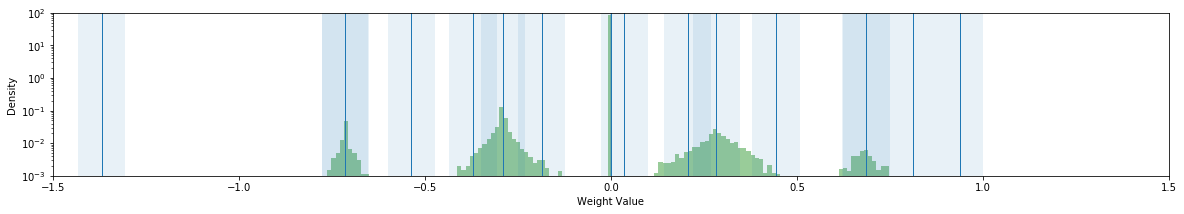

In [3]:
model, gmp, res = retrain_model(250, 10, 2500, 1250, 5e-7, 5, 16, "SWSModel", "full", 'MSEST', False, "")
show_sws_weights_log(model = model, means = list(gmp.means.data.clone().cpu()), precisions = list(gmp.gammas.data.clone().cpu()))

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 250.0 Variance: 10.0
Epoch: 10. Test Accuracy: 98.00, Prune Accuracy: 97.64, Sparsity: 98.72
Epoch: 20. Test Accuracy: 98.30, Prune Accuracy: 97.81, Sparsity: 98.72
Epoch: 30. Test Accuracy: 98.29, Prune Accuracy: 97.76, Sparsity: 98.71
Epoch: 40. Test Accuracy: 98.25, Prune Accuracy: 97.79, Sparsity: 98.71
Epoch: 50. Test Accuracy: 98.22, Prune Accuracy: 97.82, Sparsity: 98.71
Retrain Test: 98.22, Prune Test: 97.82, Prune Sparsity: 98.71


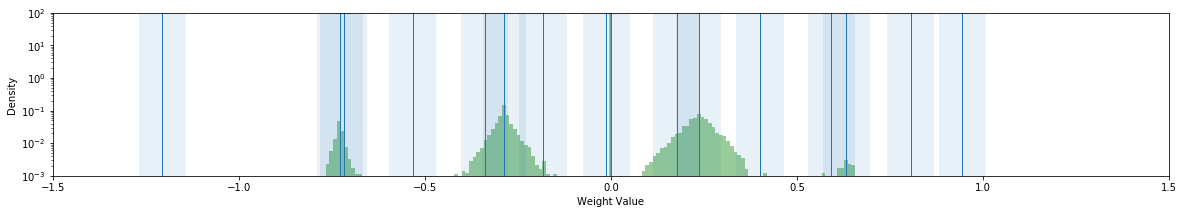

In [4]:
model, gmp, res = retrain_model(250, 10, 2500, 1250, 2e-7, 3, 16, "SWSModel", "full", 'MSEST', False, "")
show_sws_weights_log(model = model, means = list(gmp.means.data.clone().cpu()), precisions = list(gmp.gammas.data.clone().cpu()))

/anaconda/envs/py35/lib/python3.5/site-packages/torch/serialization.py:325: SourceChangeWarning: source code of class 'model_archs.LeNet_300_100' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 250.0 Variance: 10.0
Epoch: 10. Test Accuracy: 89.76, Prune Accuracy: 88.00, Sparsity: 32.53
Epoch: 20. Test Accuracy: 89.80, Prune Accuracy: 88.56, Sparsity: 38.60
Epoch: 30. Test Accuracy: 89.93, Prune Accuracy: 88.37, Sparsity: 42.96
Epoch: 40. Test Accuracy: 89.76, Prune Accuracy: 86.35, Sparsity: 46.75
Epoch: 50. Test Accuracy: 89.72, Prune Accuracy: 85.52, Sparsity: 50.11
Retrain Test: 89.72, Prune Test: 85.52, Prune Sparsity: 50.11


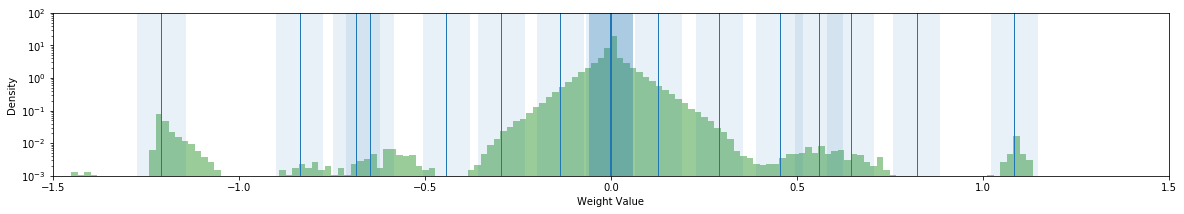

In [7]:
model, gmp, res = retrain_model(250, 10, 2500, 1250, 5e-7, 5, 16, "LeNet_300_100", "full", 'MSEST', False, "./files", dset="fashionmnist")
show_sws_weights_log(model = model, means = list(gmp.means.data.clone().cpu()), precisions = list(gmp.gammas.data.clone().cpu()))

0-component Mean: 2500.0 Variance: 1250.0
Non-zero component Mean: 250.0 Variance: 10.0
Epoch: 10. Test Accuracy: 87.32, Prune Accuracy: 85.27, Sparsity: 98.45
Epoch: 20. Test Accuracy: 87.48, Prune Accuracy: 85.91, Sparsity: 98.45
Epoch: 30. Test Accuracy: 87.71, Prune Accuracy: 86.69, Sparsity: 98.44
Epoch: 40. Test Accuracy: 87.61, Prune Accuracy: 86.78, Sparsity: 98.44
Epoch: 50. Test Accuracy: 87.77, Prune Accuracy: 86.99, Sparsity: 98.44
Retrain Test: 87.77, Prune Test: 86.99, Prune Sparsity: 98.44


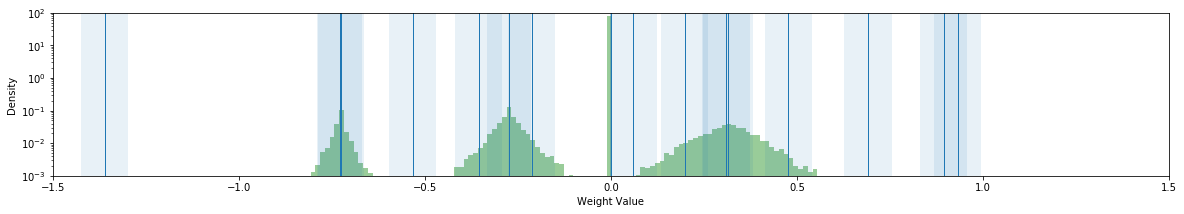

In [10]:
model, gmp, res = retrain_model(250, 10, 2500, 1250, 5e-7, 5, 16, "SWSModel", "full", 'MSEST', False, "./files", dset="fashionmnist")
show_sws_weights_log(model = model, means = list(gmp.means.data.clone().cpu()), precisions = list(gmp.gammas.data.clone().cpu()))